# The prozone effect

The prozone effect, also called the hook effect, refers to when the abundance of a molecular complex first increases then decreases as the relative concentration of a constituent molecule `E` increases.
In this example, we will say that a complex is composed of an `L` molecule, an `M` molecule, and an `E` molecule, which connects the former two together.

In [1]:
import random
random.seed(0)

In [2]:
from pykappa.system import System

system = System.from_ka(
    """
    %init: 100 L(e[.])
    %init: 100 M(e[.])

    %obs: 'E' |E()|
    %obs: 'Incomplete complexes' |E(l[_], m[.])| + |E(l[.], m[_])|
    %obs: 'Complete complexes' |E(l[_], m[_])|

    E(l[.]), L(e[.]) <-> E(l[1]), L(e[1]) @ 1, 1  // Bind L to E
    E(m[.]), M(e[.]) <-> E(m[1]), M(e[1]) @ 1, 1  // Bind M to E
    . -> E(l[.], m[.]) @ 1  // Inflow of E
    """
)

We've set up the system so that there's no `E` to start but that it flows in at a constant stochastic rate.
Let's now simulate while tracking the corresponding number of complexes:

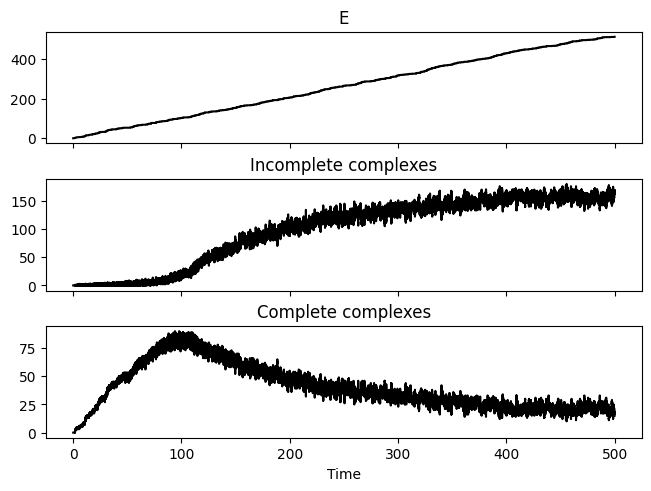

In [3]:
while system.time < 5 * 10 ** 2:
    system.update()
system.monitor.plot();

As we introduce more `E`, at first more complexes can be formed but eventually there are so many `E` that the other components of the complex become more likely to bind separate `E` molecules.
The result is that the full complex is less likely to form.